In [1]:
from DataClean import Data
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

data_edit = Data('./data/','edit distance','basic',tag=True,data_structure='clean').df
data_jacard = Data('./data/','jacard','basic',tag=True,data_structure='clean').df
data_tfidf = Data('./data/','tfidf','basic',tag=True,data_structure='clean').df

Data Merge Finished.
Data Merge Finished.
Calculating TFIDF for the project...
Calculating TFIDF for the project finished!
Calculating TFIDF for the project...
Calculating TFIDF for the project finished!
Calculating TFIDF for the project...
Calculating TFIDF for the project finished!
Calculating TFIDF for the project...
Calculating TFIDF for the project finished!
TFIDF dataframes merged!
Building assert distance & Tag info...
ALL the building finished!


In [ ]:
data_w2v_WK =Data('./all Projects/Data_NoLevel/','word2vec','basic',tag=True,Word2Vec='WK',data_structure='clean').df.fillna(0)
data_w2v_SO =Data('./all Projects/Data_NoLevel/','word2vec','basic',tag=True,Word2Vec='SO',data_structure='clean').df.fillna(0)

In [3]:
def Data_twist(df):
    df = df.fillna(0)
    for i in range(df.shape[0]):
            
        if df.loc[i,'AAA'] == '1,2':
            df.loc[i,'AAA'] = 2
        elif df.loc[i,'AAA'] == '0,1':
            df.loc[i,'AAA'] = 0
        elif df.loc[i,'AAA'] == '0,2':
            df.loc[i,'AAA'] = 0
        elif df.loc[i,'AAA'] == '0,1,2':
            df.loc[i,'AAA'] = 0
        elif df.loc[i,'AAA'] =='/':
            df.loc[i,'AAA'] = 0
        elif df.loc[i,'AAA'] == np.nan:
            df.loc[i,'AAA'] = 0
    return df

In [4]:
data_edit = Data_twist(data_edit)
data_jacard = Data_twist(data_jacard)
data_tfidf = Data_twist(data_tfidf)
data_w2v_WK =Data_twist(data_w2v_WK)
data_w2v_SO =Data_twist(data_w2v_SO)
data_w2v_SO

,testClassName,testMethodName,potentialTargetQualifiedName,AAA,Assert Distance,Name Similarity,Tag-Mock,Tag-New,Tag-Test,Tag-Get,Tag-Set
0,IterConfigUtilTest,test5,NEW org.apache.accumulo.core.conf.Configuratio...,0,18.0,0.479714,0,1,0,0,0
1,IterConfigUtilTest,test5,org.apache.accumulo.core.conf.ConfigurationCop...,0,17.0,0.286852,0,0,0,0,1
2,IterConfigUtilTest,test5,org.apache.accumulo.core.conf.ConfigurationCop...,0,16.0,0.286852,0,0,0,0,1
3,IterConfigUtilTest,test5,org.apache.accumulo.core.conf.ConfigurationCop...,0,15.0,0.286852,0,0,0,0,1
4,IterConfigUtilTest,test5,NEW org.apache.hadoop.io.Text(S...,0,14.0,0.037030,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19342,ConsulDynamicConfigurationTest,testGetConfig,ASSERT org.junit.jupiter.api.Assertions.assert...,2,0.0,0.165405,0,0,0,0,0
19343,ConsulDynamicConfigurationTest,testGetConfig,org.apache.dubbo.common.config.configcenter.Dy...,1,1.0,0.811479,0,0,0,1,0
19344,ConsulDynamicConfigurationTest,testGetConfig,ASSERT org.junit.jupiter.api.Assertions.assert...,2,0.0,0.165405,0,0,0,0,0
19345,ConsulDynamicConfigurationTest,testGetConfig,org.apache.dubbo.common.config.configcenter.Dy...,1,1.0,0.811479,0,0,0,1,0


In [5]:
def acc_kf(prob, y_test):
    count = 0
    target_count = 0
    target_acc_count = 0
    assert_count = 0
    assert_acc_count = 0
    for _ in range(len(prob)):
        if prob[_] == y_test[_]:
            count += 1
        if prob[_] == y_test[_] and prob[_] == 1:
            target_acc_count += 1
        if y_test[_] == 1:
            target_count +=1
        if prob[_] == y_test[_] and prob[_] == 2:
            assert_acc_count +=1
        if y_test[_] == 2:
            assert_count +=1
    acc = count/len(y_test)
    try:
        action_acc = target_acc_count/target_count
        print("Action Accuracy: {num}".format(num=action_acc))
    except Exception as e:
        print(e)
    # print(assert_count)
    # print(assert_acc_count)
    try:
        assert_acc = assert_acc_count/assert_count
        print("Assert accuracy: {num}".format(num=assert_acc))
    except Exception as e:
        print(e)
    print("accuracy : {num}".format(num=acc)) 
    
def recall_kf(predict, target):
    
    arrange_TP = 0
    arrange_FN = 0
    action_TP = 0
    action_FN = 0
    assert_TP = 0
    assert_FN = 0

    for _ in range(len(predict)):

        if predict[_] == target[_] and predict[_] == 0:
            arrange_TP += 1
        if predict[_] != target[_] and target[_] != 0:
            arrange_FN +=1
        if predict[_] == target[_] and predict[_] == 1:
            action_TP += 1
        if predict[_] != target[_] and target[_] != 1:
            action_FN +=1
        if predict[_] == target[_] and predict[_] == 2:
            assert_TP += 1
        if predict[_] != target[_] and target[_] != 2:
            assert_FN +=1

    try:
        arrange_recall = arrange_TP/(arrange_TP+arrange_FN)
        # print("Arrange Recall: {num}".format(num=arrange_recall))
    except Exception as e:
        print(e)
    # print(assert_count)
    # print(assert_acc_count)
    try:
        action_recall = action_TP/(action_TP+action_FN)
        # print("action recall: {num}".format(num=action_recall))
    except Exception as e:
        print(e)
    try:
        assert_recall = assert_TP/(assert_TP+assert_FN)
        # print("Assert recall: {num}".format(num=assert_recall))
    except Exception as e:
        print(e)
    return (arrange_recall,action_recall,assert_recall)

def percision_kf(predict, target):
    
    arrange_TP = 0
    arrange_FP = 0
    action_TP = 0
    action_FP = 0
    assert_TP = 0
    assert_FP = 0

    for _ in range(len(predict)):

        if predict[_] == target[_] and predict[_] == 0:
            arrange_TP += 1
        if predict[_] != target[_] and target[_] == 0:
            arrange_FP +=1
        if predict[_] == target[_] and predict[_] == 1:
            action_TP += 1
        if predict[_] != target[_] and target[_] == 1:
            action_FP +=1
        if predict[_] == target[_] and predict[_] == 2:
            assert_TP += 1
        if predict[_] != target[_] and target[_] == 2:
            assert_FP +=1

    try:
        arrange_per = arrange_TP/(arrange_TP+arrange_FP)
        # print("Arrange per: {num}".format(num=arrange_per))
    except Exception as e:
        print(e)
    # print(assert_count)
    # print(assert_acc_count)
    try:
        action_per = action_TP/(action_TP+action_FP)
        # print("action per: {num}".format(num=action_per))
    except Exception as e:
        print(e)
    try:
        assert_per = assert_TP/(assert_TP+assert_FP)
        # print("Assert per: {num}".format(num=assert_per))
    except Exception as e:
        print(e)
    return (arrange_per,action_per,assert_per)

def f1_kf(precision,recall):
    return 2*(precision*recall)/(precision+recall)

## XGBosst

Class=0, n=12386 (64.020%)
Class=1, n=1024 (5.293%)
Class=2, n=5937 (30.687%)


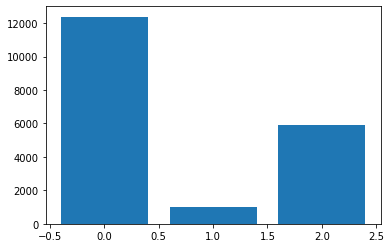

In [6]:
from collections import Counter
y = np.array(data_edit.AAA)
X = np.array(data_edit.drop(labels=['testClassName','testMethodName','potentialTargetQualifiedName','AAA'], axis=1))

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=0, n=12386 (33.333%)
Class=1, n=12386 (33.333%)
Class=2, n=12386 (33.333%)


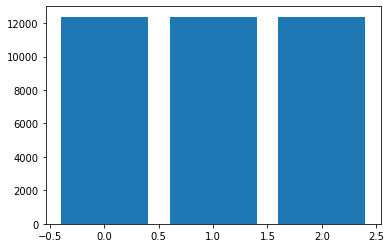

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

df_name_list = ['data_edit','data_jacard','data_w2v_WK','data_w2v_SO','data_tfidf']

for df_name in df_name_list:
    print('####################')
    print('####################')
    kf = KFold(n_splits=10,shuffle=True)
    exec('y = np.array({}.AAA).astype(np.float)'.format(df_name))
    exec('X = np.array({}.drop(labels=[\'testClassName\',\'testMethodName\',\'potentialTargetQualifiedName\',\'AAA\'], axis=1)).astype(np.float)'.format(df_name))
    
    #SMOTE
    # label encode the target variable
    y = LabelEncoder().fit_transform(y)
    # transform the dataset
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)


    # 归一化

    scaler = MinMaxScaler()
    data_edit_minmax = pd.DataFrame(data=scaler.fit_transform(X))
    target_df = pd.DataFrame(data=y)

    # XGB
    ar_recall_list = []
    ar_precision_list =[]
    ar_f1_list = []
    ac_recall_list = []
    ac_precision_list =[]
    ac_f1_list = []
    as_recall_list = []
    as_precision_list =[]
    as_f1_list = []
    rounds = 0
    for i in range(10):
        rounds += 1
        for train_index, test_index in kf.split(data_edit_minmax):
            x_train, x_test = data_edit_minmax.iloc[train_index],data_edit_minmax.iloc[test_index]
            y_train, y_test = target_df.iloc[train_index],target_df.iloc[test_index]
        
            dtrain = xgb.DMatrix(data=x_train,label=y_train)
            dtest = xgb.DMatrix(data=x_test,label=y_test)

            param = {'max_depth':5, 'eta':0.5, 'verbosity':1, 'objective':'multi:softprob','num_class':3}
            param['nthread'] = 4
            param['seed'] = 100
            num_round = 100
            bst_without_evallist = xgb.train(param, dtrain, num_round)
            ans = bst_without_evallist.predict(dtest)
            prob = np.argmax(ans, axis=1)
        
            arrange_recall,action_recall,assert_recall =recall_kf(prob,y_test.values)
            arrange_pre,action_pre,assert_pre = percision_kf(prob,y_test.values)

            ar_recall_list.append(arrange_recall)
            ar_precision_list.append(arrange_pre)
            ar_f1_list.append(f1_kf(arrange_pre,arrange_recall))

            ac_recall_list.append(action_recall)
            ac_precision_list.append(action_pre)
            ac_f1_list.append(f1_kf(action_pre,action_recall))

            as_recall_list.append(assert_recall)
            as_precision_list.append(assert_pre)
            as_f1_list.append(f1_kf(assert_pre,assert_recall))

        print('Round {0}'.format(rounds))
    dic = {'arrange_f1':ar_f1_list,'arrange_precision':ar_precision_list,'arrange_recall':ar_recall_list,'action_f1':ac_f1_list,'action_precision':ac_precision_list,'action_recall':ac_recall_list,'assert_f1':as_f1_list,'assert_precision':as_precision_list,'assert_recall':as_recall_list}
    xgb_result_df = pd.core.frame.DataFrame(dic)
    xgb_result_df.to_csv('./rq3/{}.csv'.format(df_name),index=False)
    print('{} finished'.format(df_name))
